# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import math

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

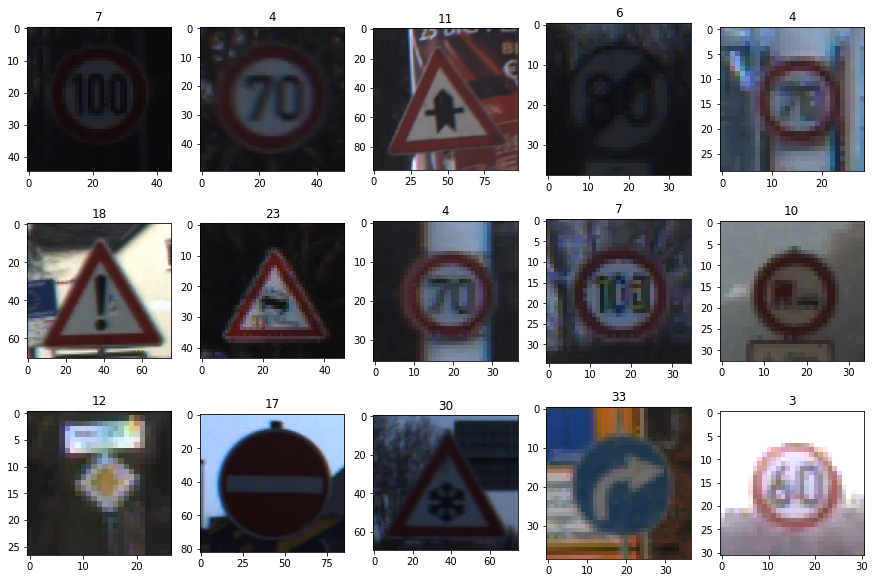

In [2]:
# Load the training labels
root = '../GTSRB' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [3]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

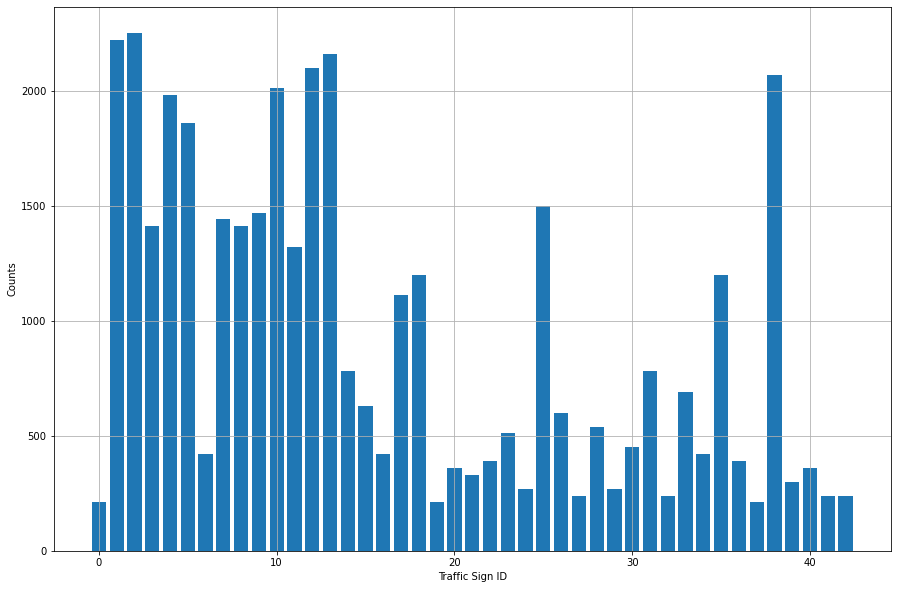

In [4]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
* Are there any classes that are (significantly) over-represented or under-represeneted?

### Answers
1. Dataset is not balanced because for some traffic signs there are many more (10x) pictures than for others.
2. Some traffic signs have 210 pictures and some have 2250. There are pictures of the least and the most represented signs at the end of this notebook.

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

#### Resolution
Most pictures have a resolution between 25x25 and 50x50, but there are pictures with a resolution of up to 230x230

In [5]:
resolution = data.apply(lambda row: math.sqrt(row['Width'] * row['Height']), axis=1)
resolution.sort_values()

18540     25.000000
35489     25.000000
20460     25.000000
6420      25.000000
34469     25.000000
            ...    
28739    216.667949
27749    219.403737
23249    221.485891
28588    221.817493
28589    233.826859
Length: 39209, dtype: float64

(Text(0.5, 0, 'Size (sqrt(width * height))'), Text(0, 0.5, 'Counts'))

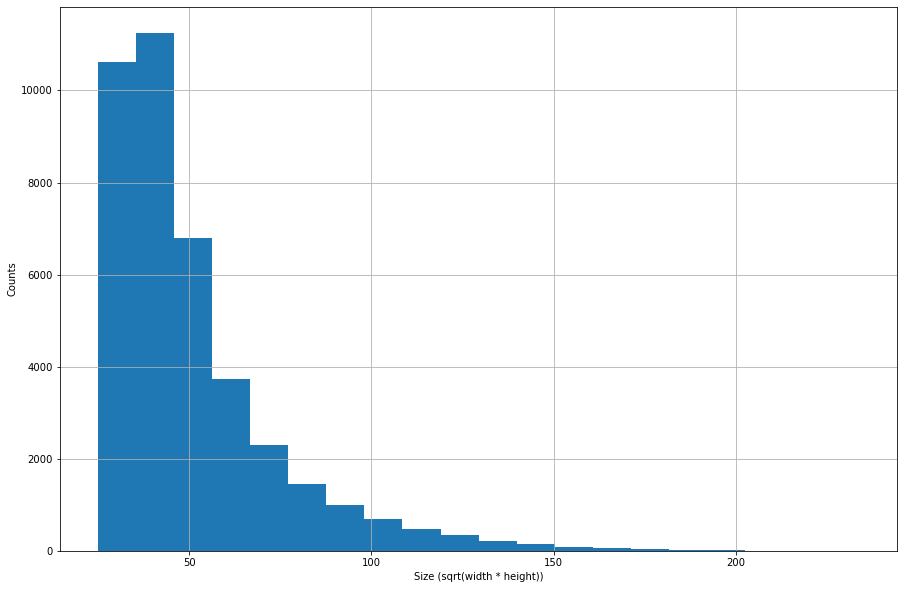

In [6]:
plt.hist(resolution, bins=20), plt.grid(True)
plt.xlabel('Size (sqrt(width * height))'), plt.ylabel('Counts')

#### Brightness
* There are many pictures with low brightness.
* Most pictures have brightnes in range (25, 125)
* Some pictures are either almost entirely black (brightness < 10) or entirely white (brightness > 245)

In [7]:
def brightness(image_path):
    img = cv2.imread(os.path.join(root, image_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #plt.imshow(img, cmap='gray')
    return img.mean()
    
#brightness(data.iloc[20000]['Path'])

In [8]:
brightness = data.apply(lambda row: brightness(row['Path']), axis=1)
brightness.sort_values()

26909      6.202023
8099       6.568439
26908      6.614294
8098       6.924132
26907      6.934991
            ...    
17103    243.577410
17102    245.636995
599      246.087719
17101    247.693878
17100    248.440009
Length: 39209, dtype: float64

(Text(0.5, 0, 'Brightness'), Text(0, 0.5, 'Counts'))

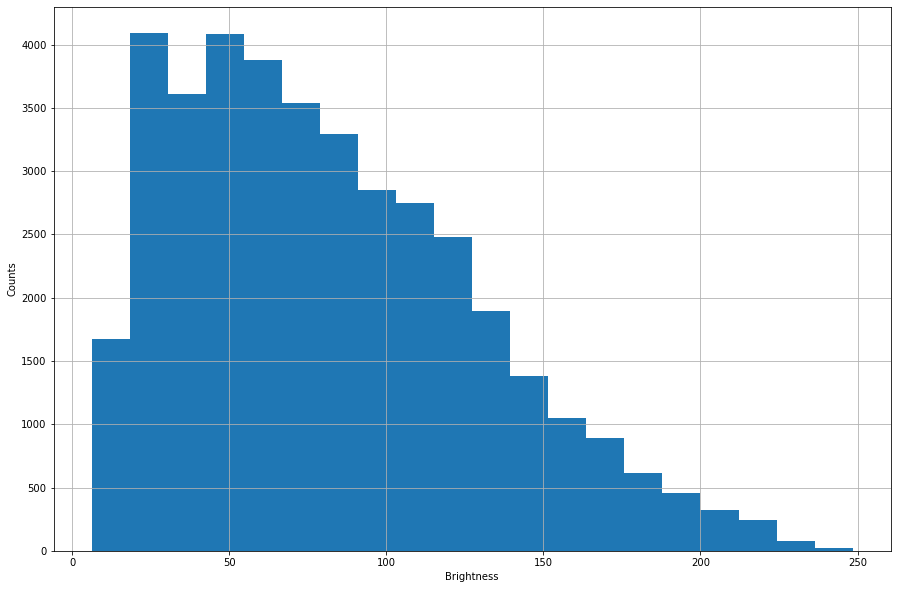

In [9]:
plt.hist(brightness, bins=20), plt.grid(True)
plt.xlabel('Brightness'), plt.ylabel('Counts')

#### The least and the most represented signs

In [10]:
meta = pd.read_csv(os.path.join(root, 'Meta.csv'))
def sign_img(class_id):
    path = meta.loc[meta['ClassId'] == class_id]['Path'].values[0]
    img = cv2.imread(os.path.join(root, path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [11]:
count_by_class = data.groupby(['ClassId'])['ClassId'].count().sort_values()
least_represented_signs = count_by_class.head(10).index.tolist()
most_represented_signs = count_by_class.tail(10).index.tolist()
most_represented_signs.reverse()
print(f'10 least represented signs: {least_represented_signs}')
print(f'10 most represented signs: {most_represented_signs}')
print(f'Count by class ID:\n{count_by_class}')

10 least represented signs: [0, 37, 19, 32, 27, 41, 42, 24, 29, 39]
10 most represented signs: [2, 1, 13, 12, 38, 10, 4, 5, 25, 9]
Count by class ID:
ClassId
0      210
37     210
19     210
32     240
27     240
41     240
42     240
24     270
29     270
39     300
21     330
40     360
20     360
36     390
22     390
6      420
16     420
34     420
30     450
23     510
28     540
26     600
15     630
33     689
14     780
31     780
17    1110
18    1200
35    1200
11    1320
3     1410
8     1410
7     1440
9     1470
25    1500
5     1860
4     1980
10    2010
38    2070
12    2100
13    2160
1     2220
2     2250
Name: ClassId, dtype: int64


#### 10 least represented signs:

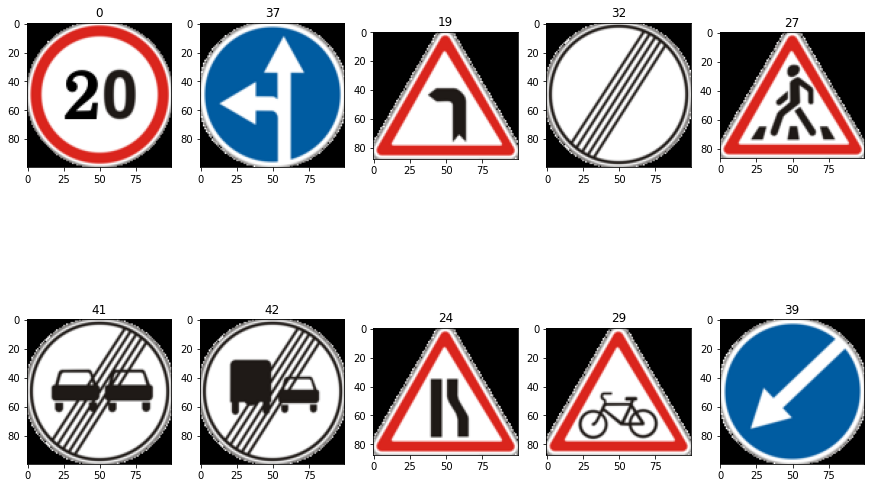

In [12]:
for i in range(len(least_represented_signs)):
    class_id = least_represented_signs[i]
    img = sign_img(class_id)
    plt.subplot(2, 5, i+1), plt.imshow(img), plt.title(str(class_id))

#### 10 most represented signs:

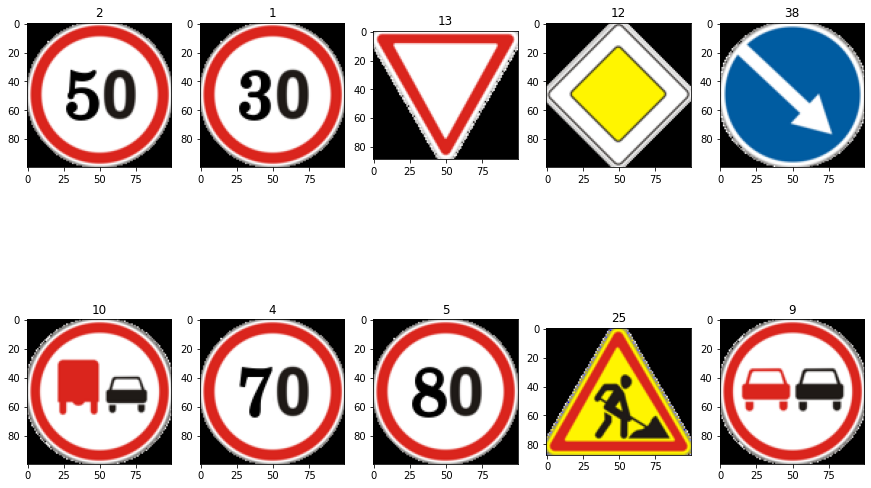

In [13]:
for i in range(len(most_represented_signs)):
    class_id = most_represented_signs[i]
    img = sign_img(class_id)
    plt.subplot(2, 5, i+1), plt.imshow(img), plt.title(str(class_id))